<a href="https://colab.research.google.com/github/JeffNyilas/WebScraping-Votos-PresidenteCamaraDosDeputados/blob/main/Extra%C3%A7%C3%A3o_dados_Estad%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import requests
from bs4 import BeautifulSoup
from attr import attrs
import re
import pandas as pd

html_votos = """<div class="custom-section" data-party="PP"><h3 class="custom-section__title">Arthur Lira</h3><p class="custom-section__lead"><span class="custom-section__count">237 votos</span></p><div class="custom-section__representatives custom-section__representatives--preview"><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204476.jpg" alt="Deputado Federal Chiquinho Brazão (Avante–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/198197.jpg" alt="Deputada Federal Greyce Elias (Avante–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204375.jpg" alt="Deputada Federal Leda Sadala (Avante–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160510.jpg" alt="Deputado Federal Luis Tibé (Avante–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178921.jpg" alt="Deputado Federal Sebastião Oliveira (Avante–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/197438.jpg" alt="Deputado Federal Tito (Avante–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178836.jpg" alt="Deputado Federal Alan Rick (DEM–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160600.jpg" alt="Deputado Federal Arthur Oliveira Maia (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178993.jpg" alt="Deputado Federal Carlos Henrique Gaguim (DEM–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204511.jpg" alt="Deputado Federal David Soares (DEM–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204412.jpg" alt="Deputado Federal Dr. Zacharias Calil (DEM–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178854.jpg" alt="Deputado Federal Elmar Nascimento (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92102.jpg" alt="Deputado Federal Leur Lomanto Júnior (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204381.jpg" alt="Deputado Federal Luis Miranda (DEM–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/66179.jpg" alt="Deputada Federal Norma Ayub (DEM–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74399.jpg" alt="Deputado Federal Onyx Lorenzoni (DEM–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204395.jpg" alt="Deputado Federal Pedro Lupion (DEM–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178901.jpg" alt="Deputada Federal Tereza Cristina (DEM–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204459.jpg" alt="Deputada Federal Daniela do Waguinho (MDB–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73692.jpg" alt="Deputado Federal Osmar Terra (MDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204413.jpg" alt="Deputado Federal Alcides Rodrigues (Patriota–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204518.jpg" alt="Deputado Federal Dr. Frederico (Patriota–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204494.jpg" alt="Deputado Federal Fred Costa (Patriota–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204566.jpg" alt="Deputado Federal Marreca Filho (Patriota–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160642.jpg" alt="Deputado Federal Pastor Eurico (Patriota–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178930.jpg" alt="Deputado Federal Roman (Patriota–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204575.jpg" alt="Deputado Federal Gil Cutrim (PDT–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204554.jpg" alt="Deputado Federal Abílio Santana (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141372.jpg" alt="Deputado Federal Aelton Freitas (PL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178937.jpg" alt="Deputado Federal Altineu Côrtes (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74052.jpg" alt="Deputado Federal Bosco Costa (PL–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178829.jpg" alt="Deputado Federal Capitão Augusto (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178924.jpg" alt="Deputado Federal Capitão Fábio Abreu (PL–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/135054.jpg" alt="Deputado Federal Cristiano Vale (PL–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204481.jpg" alt="Deputado Federal Dr. Jaziel (PL–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141417.jpg" alt="Deputado Federal Edio Lopes (PL–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204427.jpg" alt="Deputado Federal Fernando Rodolfo (PL–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204354.jpg" alt="Deputada Federal Flávia Arruda (PL–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/115746.jpg" alt="Deputado Federal Gelson Azevedo (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74383.jpg" alt="Deputado Federal Giacobo (PL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160673.jpg" alt="Deputado Federal Giovani Cherini (PL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141458.jpg" alt="Deputado Federal João Carlos Bacelar (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141459.jpg" alt="Deputado Federal João Maia (PL–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/214694.jpg" alt="Deputado Federal Jorge Goetten (PL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74554.jpg" alt="Deputado Federal José Rocha (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204550.jpg" alt="Deputado Federal Júnior Mano (PL–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74585.jpg" alt="Deputado Federal Lincoln Portela (PL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204485.jpg" alt="Deputado Federal Luiz Carlos Motta (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/162332.jpg" alt="Deputado Federal Luiz Nishimori (PL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/166402.jpg" alt="Deputada Federal Magda Mofatto (PL–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204556.jpg" alt="Deputado Federal Marcelo Ramos (PL–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178983.jpg" alt="Deputado Federal Marcio Alvino (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178985.jpg" alt="Deputado Federal Miguel Lombardi (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204570.jpg" alt="Deputado Federal Pastor Gil (PL–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204529.jpg" alt="Deputada Federal Policial Katia Sastre (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204567.jpg" alt="Deputado Federal Raimundo Costa (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204438.jpg" alt="Deputado Federal Sergio Toledo (PL–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178946.jpg" alt="Deputada Federal Soraya Santos (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204385.jpg" alt="Deputado Federal Valdevan Noventa (PL–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/137070.jpg" alt="Deputado Federal Vicentinho Júnior (PL–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160591.jpg" alt="Deputado Federal Vinicius Gurgel (PL–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74043.jpg" alt="Deputado Federal Wellington Roberto (PL–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204517.jpg" alt="Deputado Federal Zé Vitor (PL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/69871.jpg" alt="Deputado Federal Bacelar (PODE–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178929.jpg" alt="Deputado Federal Diego Garcia (PODE–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204472.jpg" alt="Deputado Federal José Medeiros (PODE–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204391.jpg" alt="Deputado Federal José Nelto (PODE–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178989.jpg" alt="Deputada Federal Renata Abreu (PODE–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178920.jpg" alt="Deputado Federal Ricardo Teobaldo (PODE–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160653.jpg" alt="Deputado Federal Roberto de Lucena (PODE–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/121948.jpg" alt="Deputado Federal Adriano do Baldy (PP–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/136811.jpg" alt="Deputado Federal Afonso Hamm (PP–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204549.jpg" alt="Deputado Federal AJ Albuquerque (PP–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178831.jpg" alt="Deputado Federal André Abdon (PP–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178882.jpg" alt="Deputado Federal André Fufuca (PP–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73696.jpg" alt="Deputada Federal Angela Amin (PP–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160541.jpg" alt="Deputado Federal Arthur Lira (PP–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74090.jpg" alt="Deputado Federal Átila Lins (PP–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74459.jpg" alt="Deputado Federal Átila Lira (PP–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178948.jpg" alt="Deputado Federal Beto Rosado (PP–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/93083.jpg" alt="Deputado Federal Cacá Leão (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204380.jpg" alt="Deputada Federal Celina Leão (PP–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204440.jpg" alt="Deputado Federal Christino Aureo (PP–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74537.jpg" alt="Deputado Federal Claudio Cajado (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160599.jpg" alt="Deputado Federal Dimas Fabiano (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204450.jpg" alt="Deputado Federal Dr. Luiz Antonio Teixeira Jr. (PP–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141421.jpg" alt="Deputado Federal Eduardo da Fonte (PP–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178871.jpg" alt="Deputado Federal Evair Vieira de Melo (PP–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/66828.jpg" alt="Deputado Federal Fausto Pinato (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92699.jpg" alt="Deputado Federal Fernando Monteiro (PP–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204510.jpg" alt="Deputado Federal Franco Cartafina (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204531.jpg" alt="Deputado Federal Guilherme Derrite (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160667.jpg" alt="Deputado Federal Guilherme Mussi (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178959.jpg" alt="Deputado Federal Hiran Gonçalves (PP–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/67138.jpg" alt="Deputada Federal Iracema Portella (PP–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/108338.jpg" alt="Deputada Federal Jaqueline Cassol (PP–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160570.jpg" alt="Deputado Federal Jerônimo Goergen (PP–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/151208.jpg" alt="Deputado Federal Laercio Oliveira (PP–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/146788.jpg" alt="Deputado Federal Marcelo Aro (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204430.jpg" alt="Deputada Federal Margarete Coelho (PP–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178858.jpg" alt="Deputado Federal Mário Negromonte Jr. (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/146307.jpg" alt="Deputado Federal Neri Geller (PP–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204406.jpg" alt="Deputado Federal Pedro Westphalen (PP–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204524.jpg" alt="Deputado Federal Pinheirinho (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204390.jpg" alt="Deputado Federal Professor Alcides (PP–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73788.jpg" alt="Deputado Federal Ricardo Barros (PP–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160655.jpg" alt="Deputado Federal Ricardo Izar (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178861.jpg" alt="Deputado Federal Ronaldo Carletto (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204399.jpg" alt="Deputado Federal Schiavinato (PP–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204397.jpg" alt="Deputado Federal Boca Aberta (PROS–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204487.jpg" alt="Deputado Federal Capitão Wagner (PROS–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178939.jpg" alt="Deputada Federal Clarissa Garotinho (PROS–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160640.jpg" alt="Deputado Federal Eros Biondini (PROS–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/72442.jpg" alt="Deputado Federal Felipe Carreras (PSB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204405.jpg" alt="Deputada Federal Liziane Bayer (PSB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178881.jpg" alt="Deputado Federal Aluisio Mendes (PSC–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204423.jpg" alt="Deputado Federal André Ferreira (PSC–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74270.jpg" alt="Deputado Federal Gilberto Nascimento (PSC–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204419.jpg" alt="Deputado Federal Glaustin da Fokus (PSC–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160534.jpg" alt="Deputada Federal Lauriete (PSC–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204363.jpg" alt="Deputado Federal Osires Damaso (PSC–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204441.jpg" alt="Deputado Federal Otoni de Paula (PSC–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/193726.jpg" alt="Deputado Federal Paulo Eduardo Martins (PSC–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo custom-representative__avatar__photo--anon" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/outros-candidatos.png" alt="Deputado Federal Ricardo da Karol (PSC–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74471.jpg" alt="Deputado Federal André de Paula (PSD–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160553.jpg" alt="Deputado Federal Antonio Brito (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204504.jpg" alt="Deputado Federal Cezinha de Madureira (PSD–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/116379.jpg" alt="Deputado Federal Darci de Matos (PSD–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178908.jpg" alt="Deputado Federal Delegado Éder Mauro (PSD–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160588.jpg" alt="Deputado Federal Diego Andrade (PSD–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/143632.jpg" alt="Deputado Federal Domingos Neto (PSD–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204562.jpg" alt="Deputado Federal Edilázio Júnior (PSD–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178953.jpg" alt="Deputado Federal Expedito Netto (PSD–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141428.jpg" alt="Deputado Federal Fabio Faria (PSD–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178969.jpg" alt="Deputado Federal Fábio Mitidieri (PSD–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204447.jpg" alt="Deputada Federal Flordelis (PSD–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204392.jpg" alt="Deputado Federal Francisco Jr. (PSD–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204465.jpg" alt="Deputado Federal Haroldo Cathedral (PSD–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141450.jpg" alt="Deputado Federal Hugo Leal (PSD–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178910.jpg" alt="Deputado Federal Joaquim Passarinho (PSD–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160619.jpg" alt="Deputado Federal José Nunes (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74317.jpg" alt="Deputado Federal Júlio Cesar (PSD–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204497.jpg" alt="Deputado Federal Júnior Ferrari (PSD–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204522.jpg" alt="Deputado Federal Marco Bertaiolli (PSD–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178843.jpg" alt="Deputado Federal Marx Beltrão (PSD–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178895.jpg" alt="Deputado Federal Misael Varella (PSD–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74165.jpg" alt="Deputado Federal Neucimar Fraga (PSD–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204573.jpg" alt="Deputado Federal Otto Alencar Filho (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74574.jpg" alt="Deputado Federal Paulo Magalhães (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo custom-representative__avatar__photo--anon" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/outros-candidatos.png" alt="Deputado Federal Pedro Augusto (PSD–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/205865.jpg" alt="Deputado Federal Reinhold Stephanes Junior (PSD–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73808.jpg" alt="Deputado Federal Sérgio Brito (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204557.jpg" alt="Deputado Federal Sidney Leite (PSD–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92776.jpg" alt="Deputado Federal Stefano Aguiar (PSD–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204396.jpg" alt="Deputado Federal Vermelho (PSD–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204560.jpg" alt="Deputado Federal Adolfo Viana (PSDB–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204496.jpg" alt="Deputado Federal Celso Sabino (PSDB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204421.jpg" alt="Deputada Federal Edna Henrique (PSDB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160645.jpg" alt="Deputado Federal Luiz Carlos (PSDB–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204471.jpg" alt="Deputada Federal Mara Rocha (PSDB–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178912.jpg" alt="Deputado Federal Pedro Cunha Lima (PSDB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204357.jpg" alt="Deputada Federal Rose Modesto (PSDB–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204545.jpg" alt="Deputada Federal Alê Silva (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204400.jpg" alt="Deputada Federal Aline Sleutjes (PSL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204374.jpg" alt="Deputada Federal Bia Kicis (PSL–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204388.jpg" alt="Deputado Federal Bibo Nunes (PSL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204507.jpg" alt="Deputada Federal Carla Zambelli (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204460.jpg" alt="Deputado Federal Carlos Jordy (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204369.jpg" alt="Deputada Federal Caroline de Toni (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204462.jpg" alt="Deputada Federal Chris Tonietto (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204376.jpg" alt="Deputado Federal Coronel Armando (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204378.jpg" alt="Deputado Federal Coronel Chrisóstomo (PSL–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204514.jpg" alt="Deputado Federal Coronel Tadeu (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204367.jpg" alt="Deputado Federal Daniel Freitas (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204454.jpg" alt="Deputado Federal Daniel Silveira (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204451.jpg" alt="Deputado Federal Delegado Antônio Furtado (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204351.jpg" alt="Deputado Federal Dr. Luiz Ovando (PSL–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/81297.jpg" alt="Deputada Federal Dra. Soraya Manato (PSL–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92346.jpg" alt="Deputado Federal Eduardo Bolsonaro (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204411.jpg" alt="Deputado Federal Filipe Barros (PSL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204473.jpg" alt="Deputado Federal General Girão (PSL–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204513.jpg" alt="Deputado Federal Guiga Peixoto (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204444.jpg" alt="Deputado Federal Helio Lopes (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204520.jpg" alt="Deputado Federal Junio Amaral (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204547.jpg" alt="Deputado Federal Léo Motta (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/196358.jpg" alt="Deputado Federal Lourival Gomes (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204455.jpg" alt="Deputado Federal Luiz Lima (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204526.jpg" alt="Deputado Federal Luiz Philippe de Orleans e Bragança (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204458.jpg" alt="Deputada Federal Major Fabiana (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/179000.jpg" alt="Deputado Federal Marcelo Álvaro Antônio (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204452.jpg" alt="Deputado Federal Márcio Labre (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204449.jpg" alt="Deputado Federal Nelson Barbudo (PSL–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204479.jpg" alt="Deputado Federal Nicoletti (PSL–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204416.jpg" alt="Deputado Federal Sanderson (PSL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/179587.jpg" alt="Deputado Federal Vitor Hugo (PSL–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204410.jpg" alt="Deputada Federal Luisa Canziani (PTB–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/133810.jpg" alt="Deputado Federal Marcelo Moraes (PTB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204538.jpg" alt="Deputado Federal Paulo Bengtson (PTB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204353.jpg" alt="Deputada Federal Aline Gurgel (Republicanos–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204356.jpg" alt="Deputado Federal Amaro Neto (Republicanos–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204414.jpg" alt="Deputado Federal Aroldo Martins (Republicanos–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/109429.jpg" alt="Deputado Federal Benes Leocádio (Republicanos–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204572.jpg" alt="Deputado Federal Capitão Alberto Neto (Republicanos–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178962.jpg" alt="Deputado Federal Carlos Gomes (Republicanos–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73441.jpg" alt="Deputado Federal Celso Russomanno (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141408.jpg" alt="Deputado Federal Cleber Verde (Republicanos–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204491.jpg" alt="Deputado Federal Gilberto Abramo (Republicanos–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204373.jpg" alt="Deputado Federal Hélio Costa (Republicanos–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160674.jpg" alt="Deputado Federal Hugo Motta (Republicanos–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160531.jpg" alt="Deputado Federal Jhonatan de Jesus (Republicanos–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74366.jpg" alt="Deputado Federal João Campos (Republicanos–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204576.jpg" alt="Deputado Federal João Roma (Republicanos–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/205550.jpg" alt="Deputado Federal Jorge Braz (Republicanos–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204372.jpg" alt="Deputado Federal Julio Cesar Ribeiro (Republicanos–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/98057.jpg" alt="Deputado Federal Lafayette de Andrada (Republicanos–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204418.jpg" alt="Deputado Federal Luizão Goulart (Republicanos–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/150418.jpg" alt="Deputado Federal Márcio Marinho (Republicanos–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204506.jpg" alt="Deputado Federal Marcos Pereira (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204540.jpg" alt="Deputada Federal Maria Rosas (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/154178.jpg" alt="Deputado Federal Milton Vieira (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204422.jpg" alt="Deputado Federal Ossesio Silva (Republicanos–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160601.jpg" alt="Deputado Federal Pr. Marco Feliciano (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/152610.jpg" alt="Deputado Federal Roberto Alves (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178945.jpg" alt="Deputada Federal Rosangela Gomes (Republicanos–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204437.jpg" alt="Deputado Federal Severino Pessoa (Republicanos–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74356.jpg" alt="Deputado Federal Silas Câmara (Republicanos–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204425.jpg" alt="Deputado Federal Silvio Costa Filho (Republicanos–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204505.jpg" alt="Deputado Federal Vavá Martins (Republicanos–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141555.jpg" alt="Deputado Federal Vinicius Carvalho (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204551.jpg" alt="Deputado Federal Bosco Saraiva (Solidariedade–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204434.jpg" alt="Deputada Federal Dra. Vanda Milani (Solidariedade–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204364.jpg" alt="Deputado Federal Eli Borges (Solidariedade–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204408.jpg" alt="Deputado Federal Gustinho Ribeiro (Solidariedade–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204432.jpg" alt="Deputada Federal Marina Santos (Solidariedade–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204475.jpg" alt="Deputado Federal Ottaci Nascimento (Solidariedade–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/143084.jpg" alt="Deputado Federal Tiago Dimas (Solidariedade–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160632.jpg" alt="Deputado Federal Zé Silva (Solidariedade–MG)" pinger-seen="true"></div></div><div class="custom-preview-overlay"><div class="custom-button">Ver todos</div></div></div></div>"""

In [117]:

soup = BeautifulSoup(html_votos, 'html.parser')

In [118]:
votos = []
for deputado in soup.find_all("div", attrs={"class": "custom-representative"}):
 dados_deputado = []
 dados_deputado.append(deputado['data-choice']) #voto
 resultado_busca_nome = re.search(r'.*Federal (.*)\((.*?)–(.*?)\)' ,deputado.img['alt'])
 dados_deputado.append(resultado_busca_nome.group(1)) #nome
 dados_deputado.append(resultado_busca_nome.group(2)) #partido
 dados_deputado.append(resultado_busca_nome.group(3)) #estado
 dados_deputado.append(deputado.img['src']) #link
 votos.append(dados_deputado)


In [119]:
votos_df = pd.DataFrame(votos, columns=['voto', 'dep. federal', 'partido', 'estado', 'img' ])

In [120]:
votos_df

,voto,dep. federal,partido,estado,img
0,Arthur Lira,Chiquinho Brazão,Avante,RJ,https://arte.estadao.com.br/public/placar/img/...
1,Arthur Lira,Greyce Elias,Avante,MG,https://arte.estadao.com.br/public/placar/img/...
2,Arthur Lira,Leda Sadala,Avante,AP,https://arte.estadao.com.br/public/placar/img/...
3,Arthur Lira,Luis Tibé,Avante,MG,https://arte.estadao.com.br/public/placar/img/...
4,Arthur Lira,Sebastião Oliveira,Avante,PE,https://arte.estadao.com.br/public/placar/img/...
...,...,...,...,...,...
232,Arthur Lira,Gustinho Ribeiro,Solidariedade,SE,https://arte.estadao.com.br/public/placar/img/...
233,Arthur Lira,Marina Santos,Solidariedade,PI,https://arte.estadao.com.br/public/placar/img/...
234,Arthur Lira,Ottaci Nascimento,Solidariedade,RR,https://arte.estadao.com.br/public/placar/img/...
235,Arthur Lira,Tiago Dimas,Solidariedade,TO,https://arte.estadao.com.br/public/placar/img/...


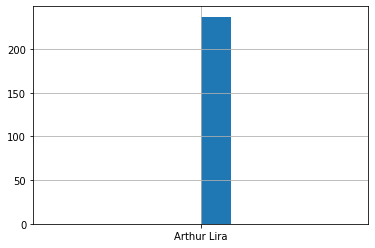

In [121]:
votos_df.voto.hist()

In [122]:
votos_df.to_csv('votos_presidente_camara.csv', index=False)

# Nova seção